In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
start_date = '2015-01-01'
end_date = '2017-01-01'
united = get_pricing('UAL',start_date = start_date,end_date = end_date)
american = get_pricing('AAL',start_date = start_date,end_date = end_date)

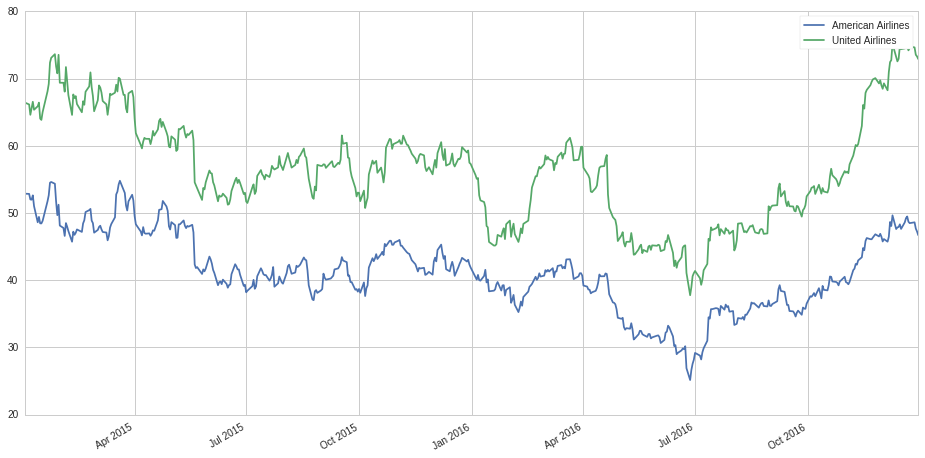

In [8]:
# Plot both plots for American Airlines and United Airlines
american['close_price'].plot(label = 'American Airlines',figsize=(16,8))
united['close_price'].plot(label = 'United Airlines',figsize=(16,8))
plt.legend();

In [9]:
# Find correlation between two time series
np.corrcoef(american['close_price'],united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

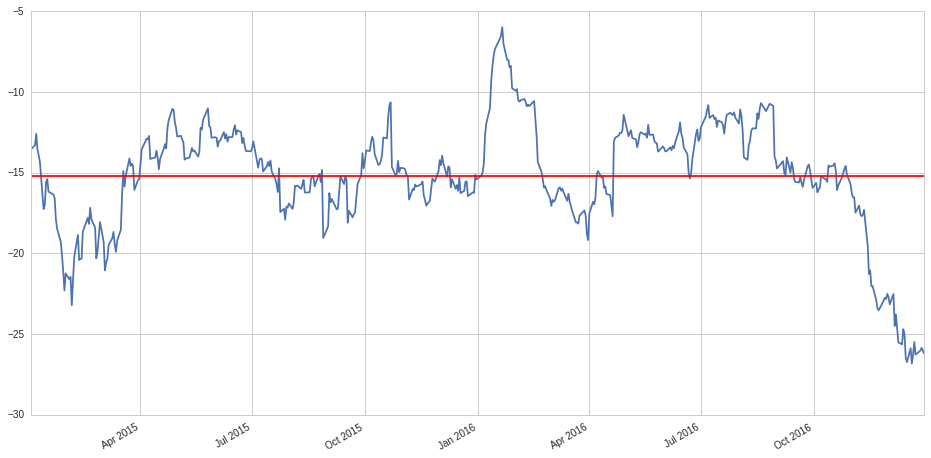

In [12]:
# highly correlated time series
# Any difference in the spread of the prices could be a trading opportunity
spread = american['close_price'] - united['close_price']
spread.plot(label = 'Spread',figsize=(16,8))
plt.axhline(spread.mean(),c = 'r');

In [13]:
# Calculate Z score
# Xi - X' / std(X)
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

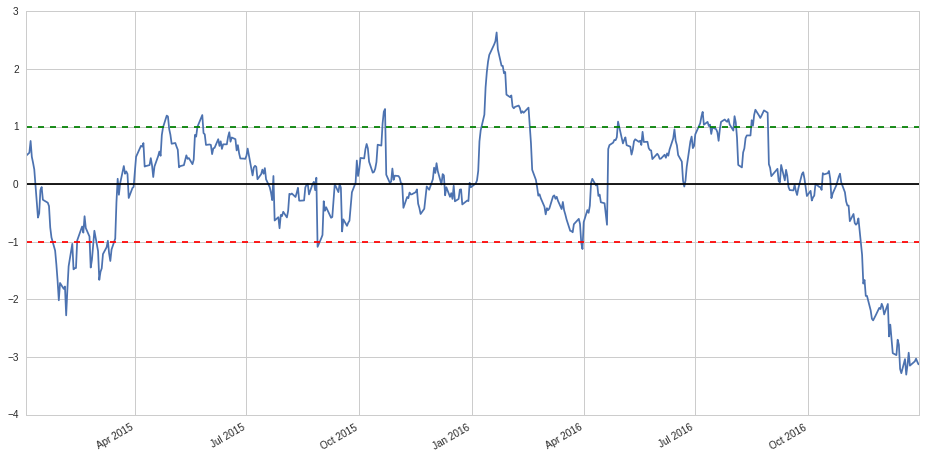

In [16]:
zscore(spread).plot(figsize=(16,8))
plt.axhline(zscore(spread).mean(),c='black');
plt.axhline(1.0,c='g',ls='--')
plt.axhline(-1.0,c='r',ls='--');

In [17]:
# Main Strategy is as follows:
# If there is a dip below -1 or peak above 1(these values could be any chosen values),there is a reversion to the mean
# Calculate rolling z score

spread_mavg1 = spread.rolling(1).mean()
spread_mavg30 = spread.rolling(30).mean()
spread_std30 = spread.rolling(30).std()
zscore_30 = (spread_mavg1 - spread_mavg30) / spread_std30

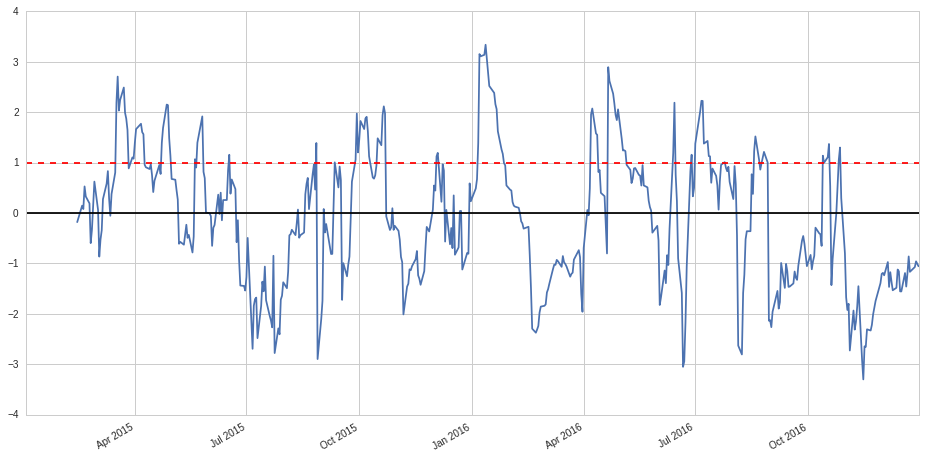

In [18]:
zscore_30.plot(figsize=(16,8),label = 'Rolling 30 Day Z Score')
plt.axhline(0,color='black')
plt.axhline(1.0,color='r',ls = '--');